In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset using the pandas module.


In [80]:
df = pd.read_csv('creditcard.csv.crdownload')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.00,0.0
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.00,0.0
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.00,0.0
11663,19915,-0.087909,0.184093,1.683910,-0.837378,-0.682605,-0.669907,-0.056222,-0.120669,0.409636,...,-0.109428,-0.054760,-0.139329,0.333267,0.072695,-0.320292,0.006423,0.010148,10.00,0.0


2. Perform missing value analysis on the dataset.


In [7]:
df.isna().sum().sum()

19

In [9]:
df.isnull().values.any()

True

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().values.any()

False

In [17]:
df.Class.value_counts()

0.0    11615
1.0       49
Name: Class, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11664 entries, 0 to 11663
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11664 non-null  int64  
 1   V1      11664 non-null  float64
 2   V2      11664 non-null  float64
 3   V3      11664 non-null  float64
 4   V4      11664 non-null  float64
 5   V5      11664 non-null  float64
 6   V6      11664 non-null  float64
 7   V7      11664 non-null  float64
 8   V8      11664 non-null  float64
 9   V9      11664 non-null  float64
 10  V10     11664 non-null  float64
 11  V11     11664 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

In [18]:
df.Amount.describe()

count    11664.000000
mean        62.795132
std        179.816783
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

3. From the dataset, calculate the number of genuine transactions, number of
fraud transactions and the percentage of fraud transactions.

In [19]:
df.Class.value_counts()

0.0    11615
1.0       49
Name: Class, dtype: int64

In [25]:
genuine_transactions = len(df[df['Class']==0])
print('Genuine transactions:',genuine_transactions)
fraud_transactions = len(df[df['Class']==1])
print('Fraud transactions:',fraud_transactions)

Genuine transactions: 11615
Fraud transactions: 49


In [28]:
percentage_of_fraud_transactions = (fraud_transactions/len(df))*100
print('Percentage of fraud transactions are:',percentage_of_fraud_transactions)
percentage_of_genuine_transactions = (genuine_transactions/len(df))*100
print('Percentage of genuine transactions are:',percentage_of_genuine_transactions)

Percentage of fraud transactions are: 0.4200960219478738
Percentage of genuine transactions are: 99.57990397805213


4. Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.



<Axes: xlabel='Class'>

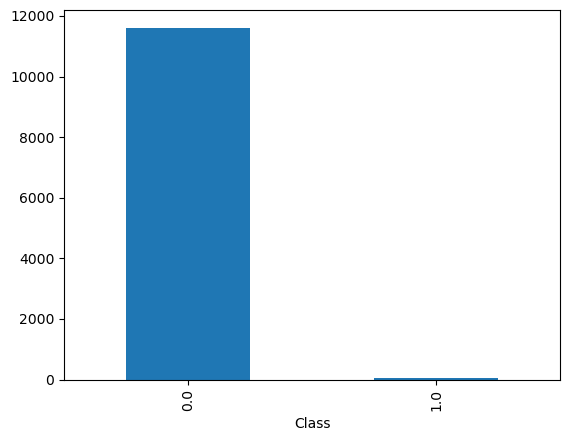

In [55]:
values = df.value_counts(df['Class'],sort=True)
values.plot(kind='bar')

5. Using the Standard Scaler module, normalize the amount column and
store the new values in the NormalizedAmount column.

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
NormalizedAmount = sc.fit_transform(df['Amount'].values.reshape(-1,1))
df['NormalizedAmount'] = NormalizedAmount

6. Split the dataset in train and test set and have a 70:30 split ratio for the
model.

In [60]:
from sklearn.model_selection import train_test_split

In [63]:
x = df.drop('Class',axis=1)
y = df['Class']

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

7. Now use a decision tree and random forest model for training on top of the train set.



In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred = dt.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test,y_pred)

0.9991428571428571

In [71]:
from sklearn.metrics import confusion_matrix

In [73]:
cf = confusion_matrix(y_test,y_pred)
print(cf)

[[3487    0]
 [   3   10]]


In [74]:
from sklearn.metrics import classification_report

In [78]:
cf = classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3487
         1.0       1.00      0.77      0.87        13

    accuracy                           1.00      3500
   macro avg       1.00      0.88      0.93      3500
weighted avg       1.00      1.00      1.00      3500



In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
y_pred = rf.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [86]:
y_test

5001    0.0
8378    0.0
5767    0.0
6600    0.0
4465    0.0
       ... 
7673    0.0
8454    0.0
2205    0.0
1879    0.0
7584    0.0
Name: Class, Length: 3500, dtype: float64

In [87]:
accuracy_score(y_test,y_pred)

0.9985714285714286

In [88]:
cf = confusion_matrix(y_test,y_pred)
print(cf)

[[3486    1]
 [   4    9]]
